## LIBRARY IMPORTS

In [1]:
!pip install ultralytics roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import glob
from IPython import display
from IPython.display import Image, display
import random
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
rf = Roboflow(api_key="..")
project = rf.workspace("works-ie5h2").project("beyblade")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.17, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to byblade-3 in yolov8:: 100%|██████████| 1810/1810 [00:00<00:00, 6256.30it/s]


In [4]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/byblade-3/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 234MB/s]
Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/byblade-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

## MODEL EVALUATION

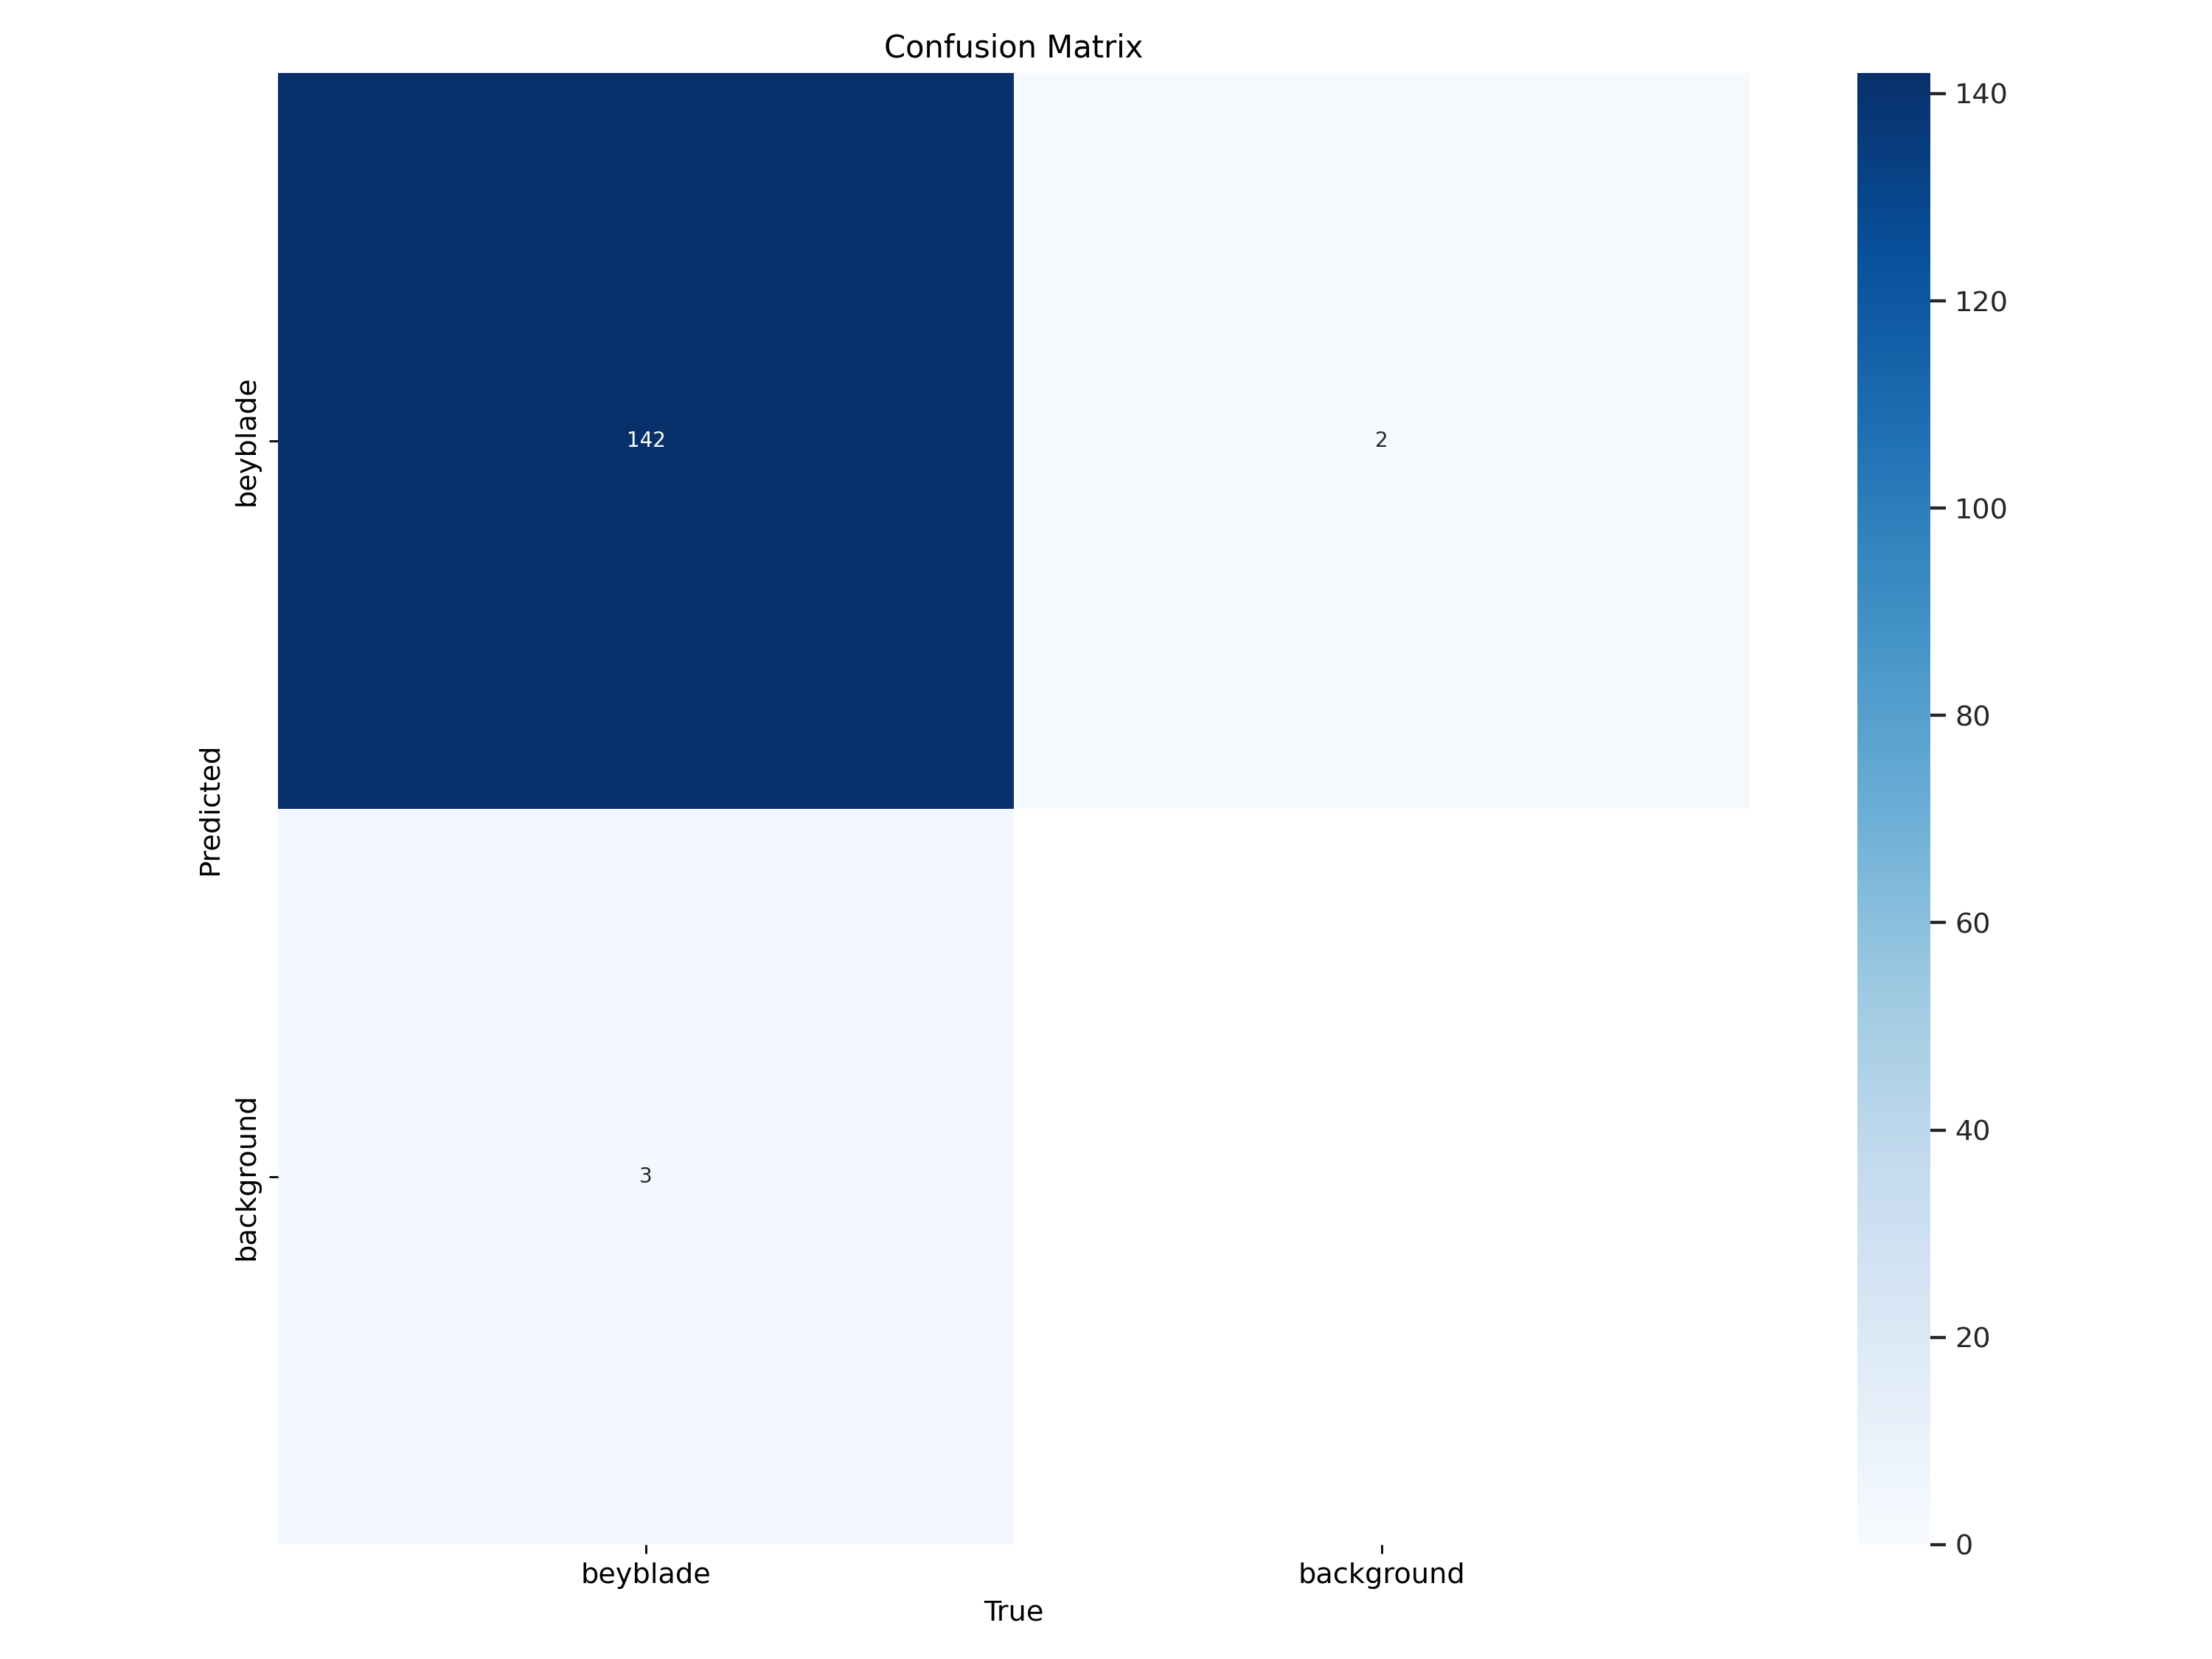

In [5]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

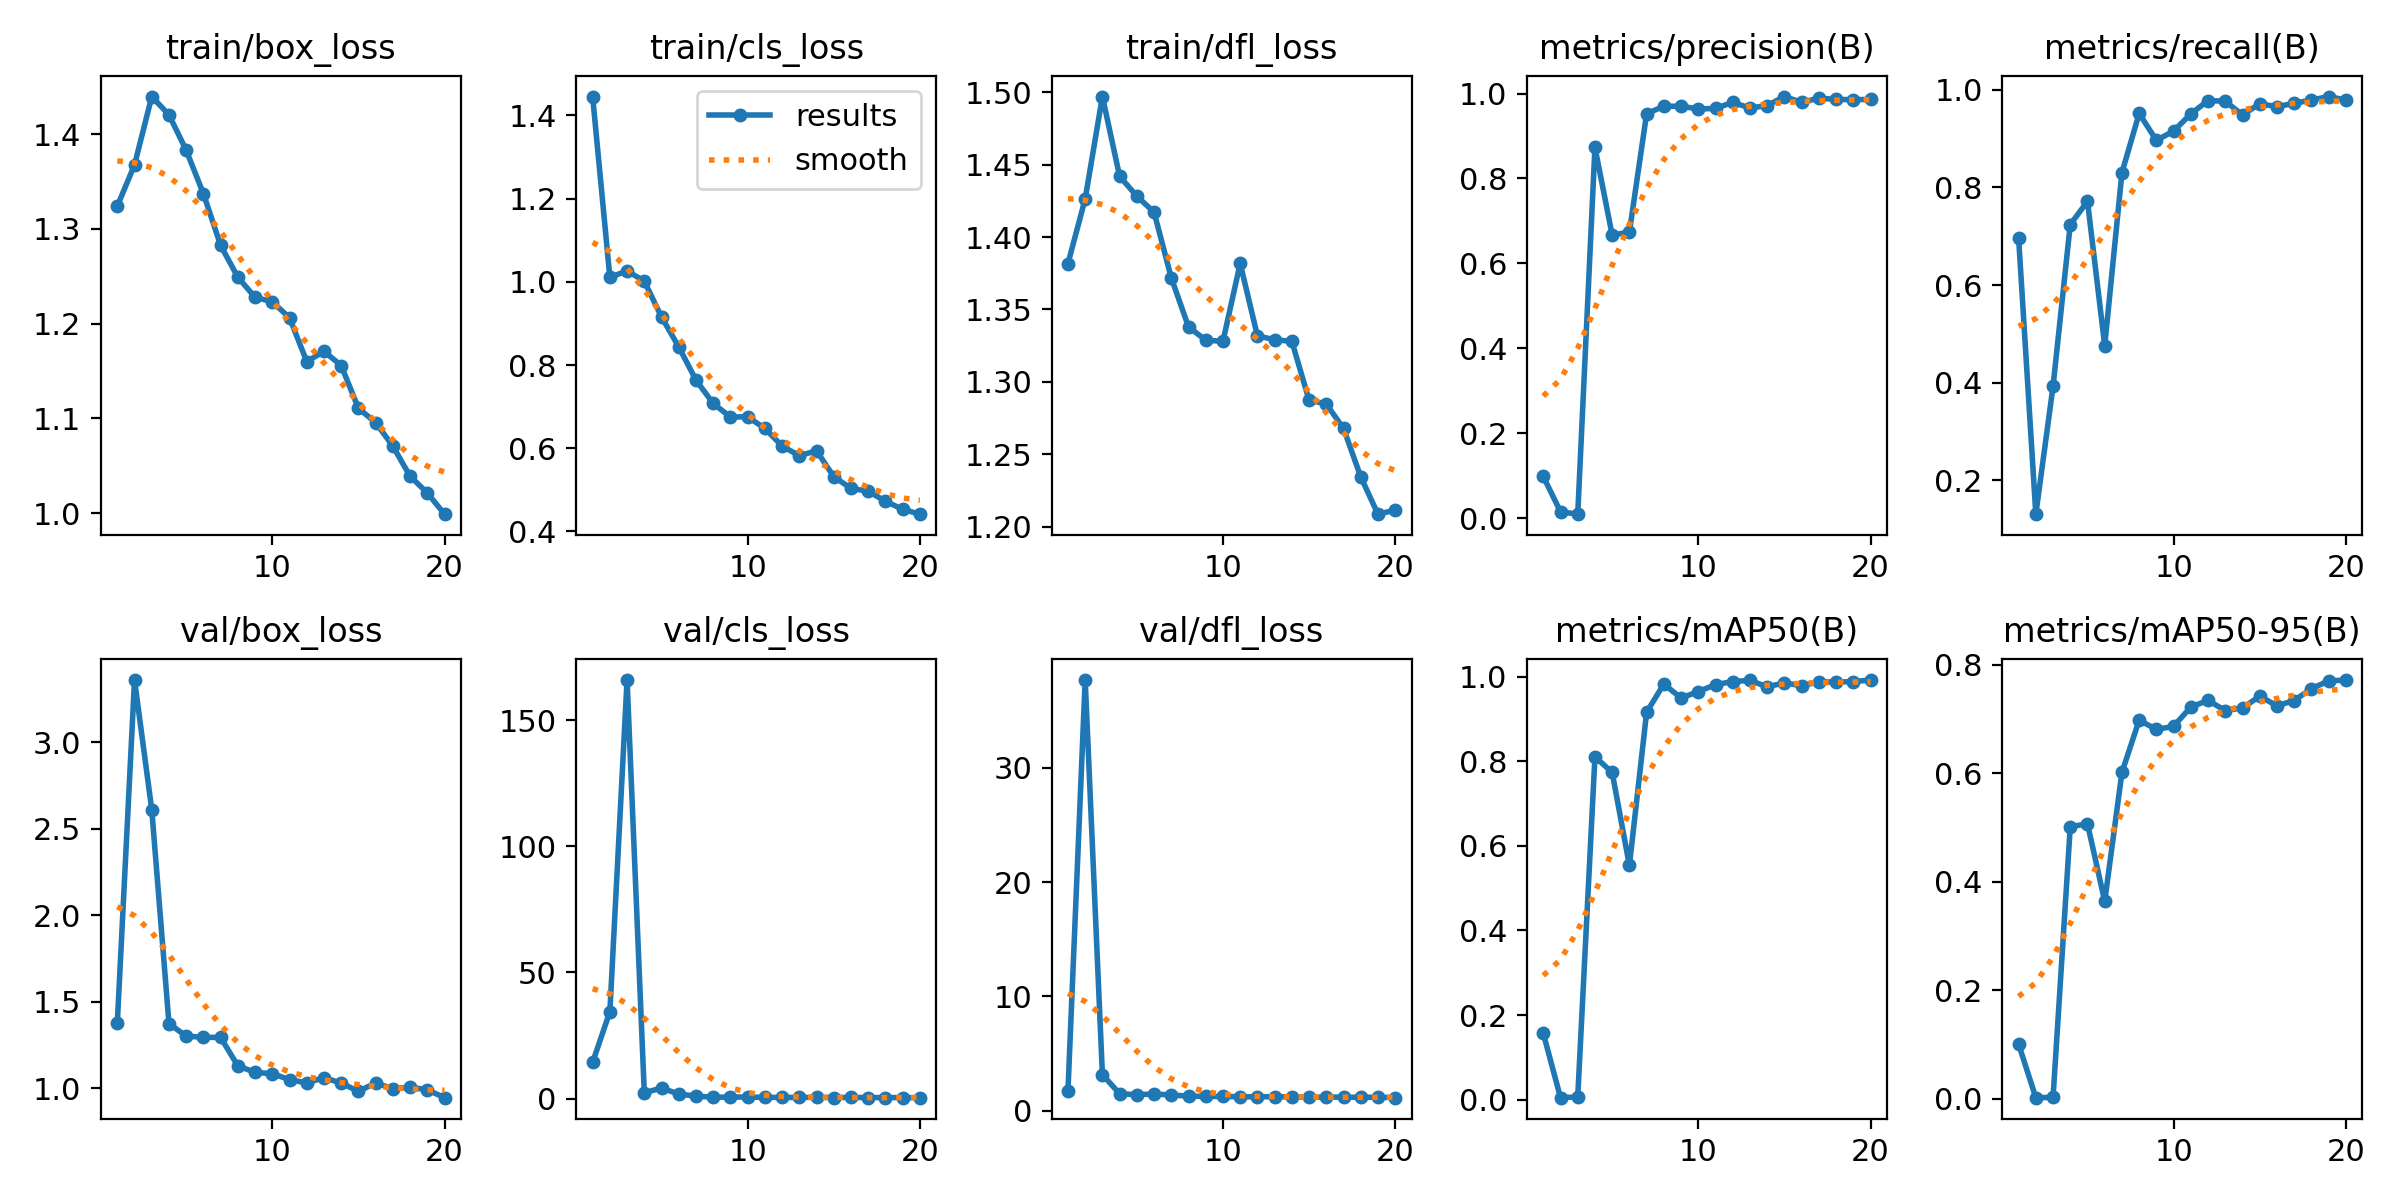

In [6]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [20]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/byblade-3/data.yaml split=train

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/byblade-3/train/labels.cache... 788 images, 3 backgrounds, 0 corrupt: 100% 788/788 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 50/50 [00:25<00:00,  1.95it/s]
                   all        788       1507      0.985      0.987      0.993      0.768
Speed: 0.6ms preprocess, 20.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [21]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/byblade-3/data.yaml split=val

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/byblade-3/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:07<00:00,  1.58s/it]
                   all         73        145      0.986      0.979      0.992      0.777
Speed: 4.4ms preprocess, 28.8ms inference, 0.0ms loss, 34.1ms postprocess per image
Results saved to runs/detect/val6
💡 Learn more at https://docs.ultralytics.com/modes/val


In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/byblade-3/data.yaml split=test

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/byblade-3/test/labels... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<00:00, 1350.23it/s]
val: New cache created: /content/byblade-3/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.89s/it]
                   all         38         86       0.99      0.977      0.994      0.748
Speed: 0.3ms preprocess, 54.8ms inference, 0.0ms loss, 54.3ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [42]:
import plotly.graph_objs as go

# Data
data = [
    ['train', 0.985, 0.987, 0.993, 0.768],
    ['val', 0.986, 0.979, 0.992, 0.777],
    ['test', 0.99, 0.977, 0.994, 0.748]
]

# Transpose the data for the table
data_transposed = list(map(list, zip(*data)))

# Create table
table = go.Figure(data=[go.Table(
    header=dict(values=['Dataset', 'Precision', 'Recall', 'mAP50', 'mAP50-95']),
    cells=dict(values=data_transposed)
)])

# Customize layout
table.update_layout(
    title='Performance Metrics',
    width=800,  # Set the width of the table
    height=330,  # Set the height of the table
    template='presentation',  # Set the background template
)

# Show table
table.show()


### Evaluation Metric

**Precision**:

Explanation: Precision measures the accuracy of the model's predictions by calculating the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
Interpretation: A precision score of 0.985 on the training set means that out of all the predicted positive instances of detecting beyblades, 98.5% of them were correct. In simpler terms, when the model says it has found a beyblade, it is correct 98.5% of the time.

**Recall**:

Explanation: Recall, also known as sensitivity, measures the model's ability to identify all positive instances by calculating the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
Interpretation: A recall score of 0.987 on the training set means that out of all the actual beyblades present in the images, the model identified 98.7% of them. In other words, the model captures almost all beyblades present in the images.

**mAP50 (Mean Average Precision at IoU threshold of 0.5)**:

Explanation: mAP50 measures the average precision of the model across all classes at an Intersection over Union (IoU) threshold of 0.5. It evaluates the accuracy of the model's bounding box predictions.
Interpretation: A mAP50 score of 0.993 on the training set means that the model achieved an average precision of 99.3% in accurately localizing beyblades with bounding boxes at an IoU threshold of 0.5.

**mAP50 95 (Mean Average Precision across IoU thresholds from 0.5 to 0.95)**:

Explanation: mAP50 95 measures the average precision of the model across all classes by considering IoU thresholds ranging from 0.5 to 0.95. It provides a broader assessment of the model's performance across various levels of precision.
Interpretation: A mAP50 95 score of 0.768 on the training set means that the model achieved an average precision of 76.8% across different IoU thresholds from 0.5 to 0.95, indicating its ability to accurately detect beyblades with varying degrees of overlap with the ground truth bounding boxes.

In [8]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/byblade-3/test/images/*.jpg

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/38 /content/byblade-3/test/images/10_png.rf.589d0218d0c6379f7148fd90ad760a35.jpg: 640x640 2 beyblades, 37.1ms
image 2/38 /content/byblade-3/test/images/12_png.rf.c74a6041556d8412392760e18698cf03.jpg: 640x640 2 beyblades, 37.3ms
image 3/38 /content/byblade-3/test/images/13_png.rf.525d0da454bfd3c85e5da5349cd29c09.jpg: 640x640 2 beyblades, 37.3ms
image 4/38 /content/byblade-3/test/images/18_png.rf.71f2094eb5b0bc5ce634edba081d8d3a.jpg: 640x640 2 beyblades, 37.2ms
image 5/38 /content/byblade-3/test/images/18_png.rf.d07d407fa22d3949ce4593c942fda22c.jpg: 640x640 3 beyblades, 37.2ms
image 6/38 /content/byblade-3/test/images/19_png.rf.0074a9b485138f1a8231223b9cabbbdc.jpg: 640x640 2 beyblades, 34.8ms
image 7/38 /content/byblade-3/test/images/20_png.rf.04f61ba5c129e6a94704ef651cb88200.jpg: 640x640 2 beyblades, 27.1ms
image

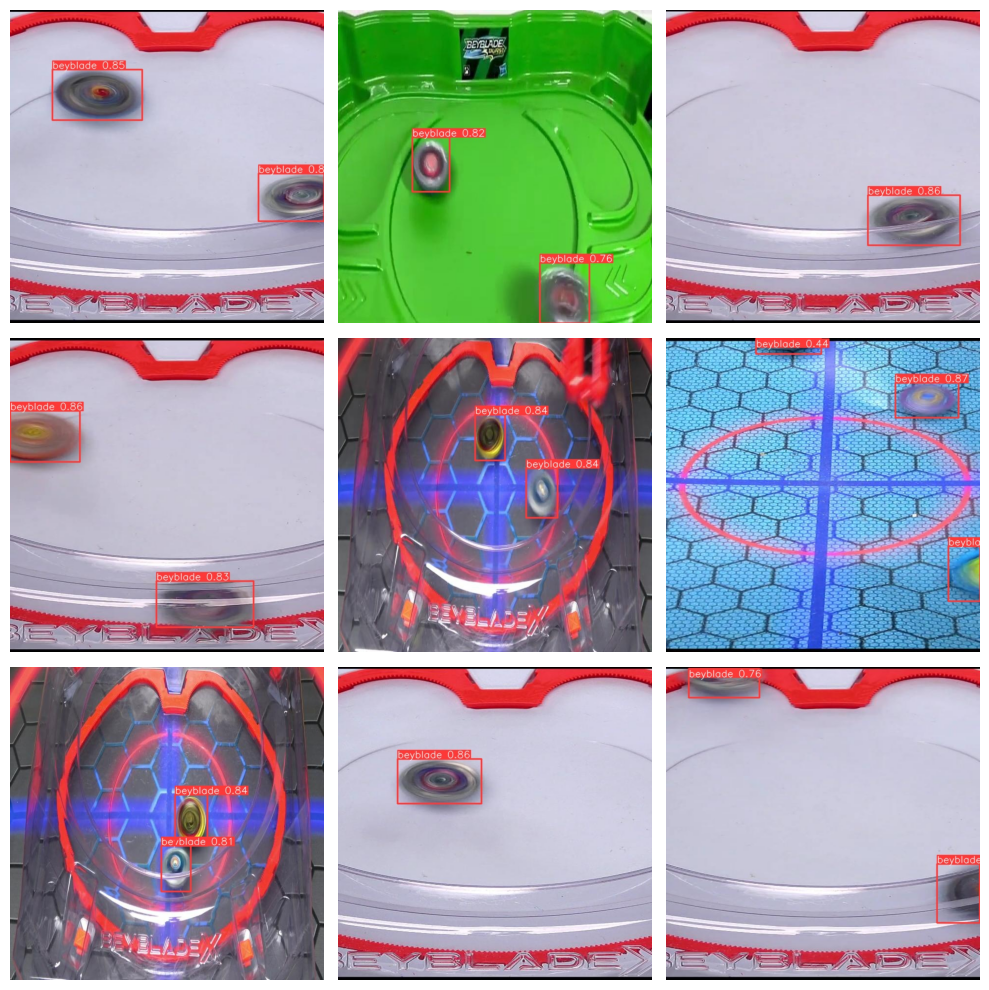

In [14]:
# Get the file paths of all images in the directory
image_paths = glob.glob('/content/runs/detect/predict/*.jpg')

# Select 9 random image paths
random_image_paths = random.sample(image_paths, 9)

# Create a figure and axis
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterate over the random image paths and display each image
for i, image_path in enumerate(random_image_paths):
    # Load image
    img = Image.open(image_path)

    # Plot image
    ax = axs[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

## EVALUATION REPORT

In [ ]:
data = [
    ['train', 0.985, 0.987, 0.993, 0.768],
    ['val', 0.986, 0.979, 0.992, 0.777],
    ['test', 0.99, 0.977, 0.994, 0.748]
]

data_transposed = list(map(list, zip(*data)))
table = go.Figure(data=[go.Table(
    header=dict(values=['Dataset', 'Precision', 'Recall', 'mAP50', 'mAP50-95']),
    cells=dict(values=data_transposed)
)])

table.update_layout(
    title='Performance Metrics',
    width=800,
    height=330,
    template='presentation',
)

# Show table
table.show()

**Precision**:

Training Set: 98.5% ;
Validation Set: 98.6% ;
Test Set: 99.0%

Precision is akin to the model's sharpness, signifying how often it gets things right. In simpler terms, when our model spots a beyblade, it's accurate approximately [Precision]% of the time. This reliability suggests that if we deploy it on new, unseen videos, it's likely to perform well in detecting beyblades.

**Recall**:

Training Set: 98.7% ;
Validation Set: 97.9% ;
Test Set: 97.7%

Recall measures the model's thoroughness, reflecting its ability to catch all beyblades present in images.
A recall score of [Recall]% implies our model successfully spots nearly all beyblades, ensuring comprehensive coverage in our inspections.

**mAP50 (Mean Average Precision at IoU threshold of 0.5)**:

Training Set: 99.3% ;
Validation Set: 99.2% ;
Test Set: 99.4%

Imagine you're trying to find specific objects, like beyblades, in a bunch of pictures. mAP50 tells us how good our model is at finding these objects accurately.
A higher mAP50 score means our model is really good at pointing out where the beyblades are in the pictures. This is super important for checking the quality of our products.

**mAP50.95 (Mean Average Precision across IoU thresholds from 0.5 to 0.95)**:

Training Set: 76.8% ;
Validation Set: 77.7% ;
Test Set: 74.8%

mAP50.95 Now, let's say we want our model to be even better at finding those beyblades. mAP50 95 looks at how well our model does this job, but it also considers different levels of difficulty.
It's like testing our model's accuracy in different situations. So, even if things get a bit tricky (like if the beyblade is only partly visible), our model still does a good job overall.

**In summary, our object detection model demonstrates exceptional accuracy and reliability in identifying beyblades within images, as reflected in its strong performance across multiple evaluation metrics. These results affirm the potential of our model to enhance quality control and production efficiency within our manufacturing processes.**